# K vecinos más cercanos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#dataset de caracteristicas de vehiculos
#permite predecir el tipo de vehiculo segun su "silueta"
#descargado de https://www.apispreadsheets.com/datasets (mldata.io)

In [3]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: 9C30-9931

 Directorio de C:\Users\erik_\Curso-IA-Udemy\K vecinos

04/08/2021  20:24    <DIR>          .
04/08/2021  20:24    <DIR>          ..
04/08/2021  20:04    <DIR>          .ipynb_checkpoints
04/08/2021  20:03            82.518 Captura de pantalla 2021-08-04 200316.png
04/08/2021  20:24            69.880 K vecinos más cercanos knn.ipynb
04/08/2021  20:02            86.768 vehiculos.csv
               3 archivos        239.166 bytes
               3 dirs  53.483.159.552 bytes libres


In [4]:
dataframe = pd.read_csv("vehiculos.csv")

In [5]:
dataframe.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [6]:
dataframe['vehicle_class'].unique() #tipos de vehiculos

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [7]:
y = dataframe['vehicle_class']
x = dataframe.drop('vehicle_class',axis=1) #asignamos todo el dataframe menos la clase de vehiculos, y le decimos que es una columna

In [8]:
x

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=45)

In [11]:
X_train

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio
794,87.0,41.0,76.0,165.0,67.0,7.0,148.0,45.0,19.0,140.0,171.0,327.0,152.0,72.0,7.0,13.0,188.0,195.0
317,95.0,45.0,105.0,208.0,64.0,10.0,187.0,36.0,22.0,150.0,202.0,520.0,158.0,64.0,7.0,32.0,198.0,211.0
570,105.0,53.0,108.0,206.0,63.0,12.0,222.0,31.0,25.0,168.0,226.0,712.0,201.0,71.0,15.0,35.0,189.0,203.0
750,96.0,40.0,78.0,170.0,58.0,7.0,174.0,38.0,21.0,139.0,197.0,455.0,160.0,68.0,3.0,29.0,191.0,200.0
374,87.0,36.0,53.0,117.0,58.0,4.0,118.0,57.0,17.0,125.0,138.0,205.0,138.0,85.0,9.0,15.0,180.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,91.0,37.0,76.0,138.0,55.0,8.0,132.0,51.0,18.0,135.0,157.0,256.0,124.0,69.0,0.0,12.0,191.0,192.0
607,86.0,39.0,62.0,129.0,59.0,6.0,116.0,57.0,17.0,135.0,137.0,203.0,145.0,64.0,7.0,9.0,199.0,204.0
544,88.0,43.0,70.0,177.0,74.0,19.0,152.0,44.0,19.0,143.0,180.0,342.0,168.0,76.0,1.0,9.0,186.0,189.0
643,95.0,43.0,83.0,198.0,69.0,6.0,177.0,36.0,21.0,139.0,189.0,484.0,163.0,68.0,6.0,4.0,196.0,198.0


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
predicciones = knn.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
print(confusion_matrix(Y_test,predicciones))

[[65  0  7  5]
 [ 7 24 28  6]
 [ 5 26 23  3]
 [ 2  0  2 51]]


In [17]:
print(classification_report(Y_test,predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

    accuracy                           0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254



In [18]:
# en knn = KNeighborsClassifier(n_neighbors=1) pusimos el valor 1
#para mejorar la precision hay que encontrar el valor más optimo

In [19]:
tasa_error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    prediccion_i = knn.predict(X_test)
    tasa_error.append(np.mean(prediccion_i != Y_test))
print(tasa_error)

[0.35826771653543305, 0.3464566929133858, 0.3188976377952756, 0.3228346456692913, 0.33858267716535434, 0.3346456692913386, 0.3228346456692913, 0.33858267716535434, 0.36220472440944884, 0.3661417322834646, 0.35039370078740156, 0.3661417322834646, 0.36220472440944884, 0.38188976377952755, 0.35039370078740156, 0.3661417322834646, 0.3661417322834646, 0.3700787401574803, 0.3661417322834646, 0.3779527559055118, 0.3661417322834646, 0.37401574803149606, 0.37401574803149606, 0.37401574803149606, 0.3779527559055118, 0.38976377952755903, 0.38188976377952755, 0.3700787401574803, 0.37401574803149606]


In [20]:
tasa_error

[0.35826771653543305,
 0.3464566929133858,
 0.3188976377952756,
 0.3228346456692913,
 0.33858267716535434,
 0.3346456692913386,
 0.3228346456692913,
 0.33858267716535434,
 0.36220472440944884,
 0.3661417322834646,
 0.35039370078740156,
 0.3661417322834646,
 0.36220472440944884,
 0.38188976377952755,
 0.35039370078740156,
 0.3661417322834646,
 0.3661417322834646,
 0.3700787401574803,
 0.3661417322834646,
 0.3779527559055118,
 0.3661417322834646,
 0.37401574803149606,
 0.37401574803149606,
 0.37401574803149606,
 0.3779527559055118,
 0.38976377952755903,
 0.38188976377952755,
 0.3700787401574803,
 0.37401574803149606]

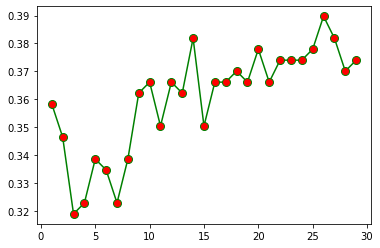

In [21]:
valores = range(1,30)
plt.plot(valores, tasa_error,color='green',marker='o',markerfacecolor="red",markersize=8)

In [22]:
# el valor más optimo es el numero 3. (tiene menos tasa de error)

In [23]:
#Antes:
print(classification_report(Y_test,predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

    accuracy                           0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254



In [24]:
#Ahora:

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
predicciones = knn.predict(X_test)
print(classification_report(Y_test,predicciones))

              precision    recall  f1-score   support

         bus       0.77      0.88      0.82        77
        opel       0.58      0.45      0.50        65
        saab       0.44      0.39      0.41        57
         van       0.82      0.98      0.89        55

    accuracy                           0.68       254
   macro avg       0.65      0.67      0.66       254
weighted avg       0.66      0.68      0.66       254

